# Movie Recommendation System

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# Load datasets
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')


In [3]:
# Display the first few rows of each dataset
print("Ratings Data:")
print(ratings.head())
print("\nMovies Data:")
print(movies.head())
print("\nTags Data:")
print(tags.head())
print("\nLinks Data:")
print(links.head())

Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags Data:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445

In [4]:
# Basic information about datasets
print("\nDataset Info:")
print("Ratings Info:\n", ratings.info())
print("Movies Info:\n", movies.info())
print("Tags Info:\n", tags.info())
print("Links Info:\n", links.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Ratings Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
Movies Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId  

In [5]:
# Check for missing values
print("\nMissing Values:")
print("Ratings:\n", ratings.isnull().sum())
print("Movies:\n", movies.isnull().sum())
print("Tags:\n", tags.isnull().sum())
print("Links:\n", links.isnull().sum())


Missing Values:
Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Movies:
 movieId    0
title      0
genres     0
dtype: int64
Tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Links:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [6]:
# Merge ratings and movies for better analysis
merged_data = pd.merge(ratings, movies, on='movieId', how='inner')
print("\nMerged Data Preview:")
print(merged_data.head())


Merged Data Preview:
   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


In [7]:
# Convert timestamp to datetime
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], unit='s')
print("\nConverted Timestamp:")
print(merged_data['timestamp'].head())


Converted Timestamp:
0   2000-07-30 18:45:03
1   1996-11-08 06:36:02
2   2005-01-25 06:52:26
3   2017-11-13 12:59:30
4   2011-05-18 05:28:03
Name: timestamp, dtype: datetime64[ns]


In [8]:
# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(merged_data.describe())


Descriptive Statistics:
              userId        movieId         rating
count  100836.000000  100836.000000  100836.000000
mean      326.127564   19435.295718       3.501557
std       182.618491   35530.987199       1.042529
min         1.000000       1.000000       0.500000
25%       177.000000    1199.000000       3.000000
50%       325.000000    2991.000000       3.500000
75%       477.000000    8122.000000       4.000000
max       610.000000  193609.000000       5.000000


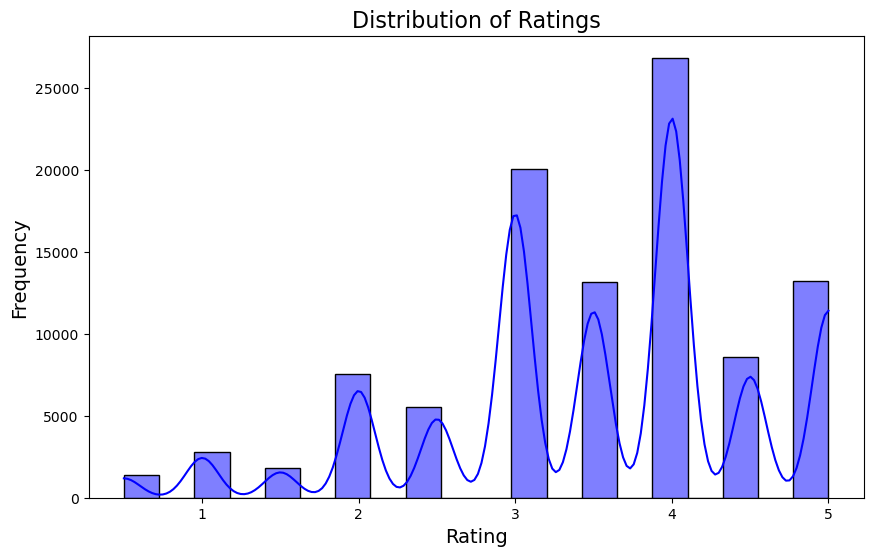

In [9]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


Top 10 Most Rated Movies:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64


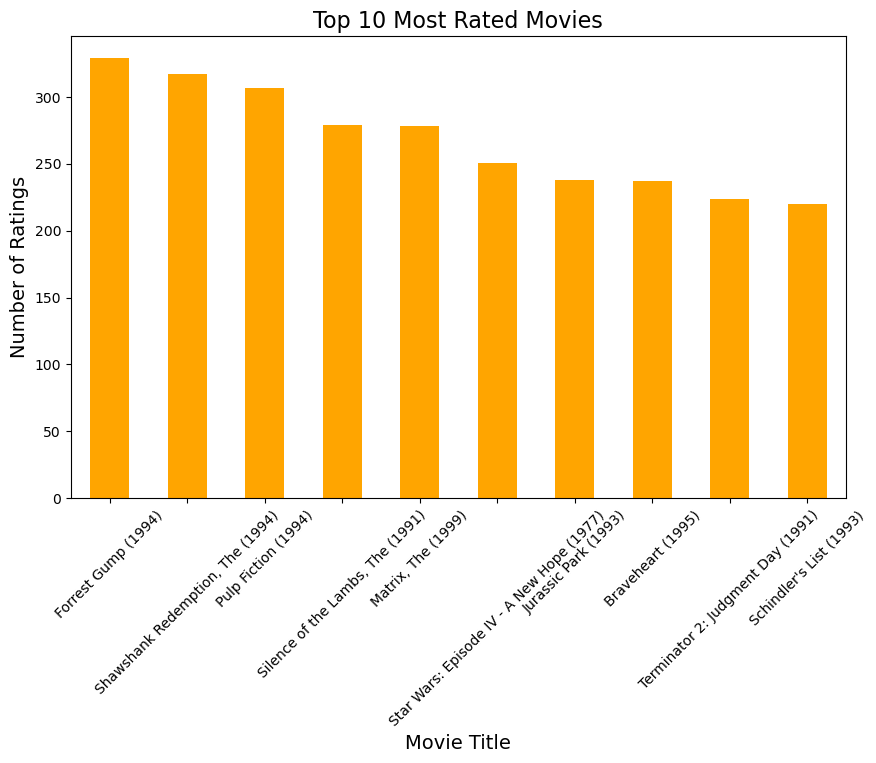

In [10]:
# Most rated movies
top_rated_movies = merged_data.groupby('title').size().sort_values(ascending=False).head(10)
print("\nTop 10 Most Rated Movies:")
print(top_rated_movies)

plt.figure(figsize=(10, 6))
top_rated_movies.plot(kind='bar', color='orange')
plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Movie Title', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45)
plt.show()


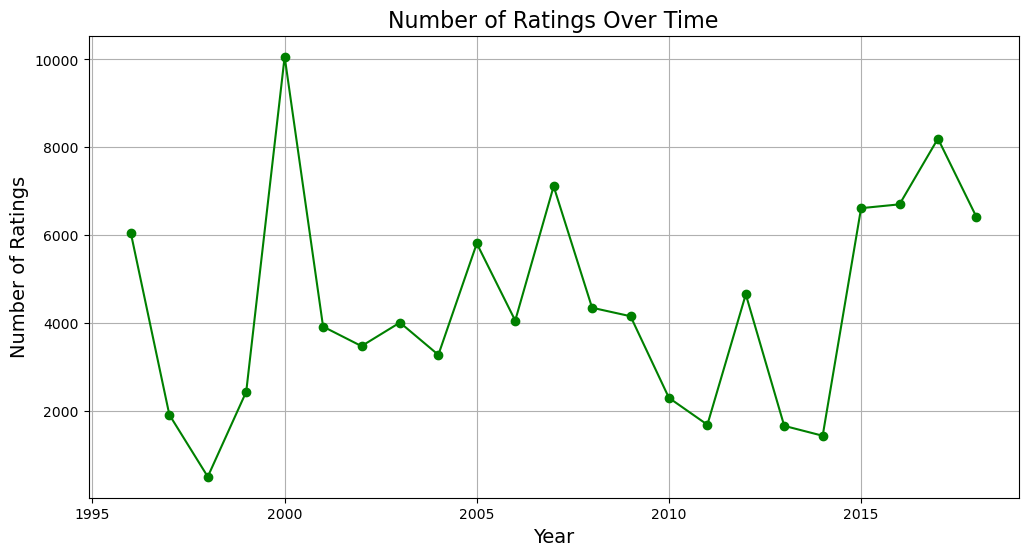

In [11]:
# Rating trends over time
merged_data['year'] = merged_data['timestamp'].dt.year
ratings_per_year = merged_data.groupby('year').size()

plt.figure(figsize=(12, 6))
ratings_per_year.plot(kind='line', marker='o', color='green')
plt.title('Number of Ratings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.grid()
plt.show()

In [12]:
# Ensure 'genres' column is split into lists and handle missing values
movies['genres'] = movies['genres'].fillna('')  # Replace NaN with an empty string
movies['genres'] = movies['genres'].str.split('|')  # Split genres into lists

# Flatten the list of genres while handling potential empty lists
from itertools import chain
all_genres = list(chain.from_iterable(movies['genres']))

# Count the frequency of each genre
genre_count = pd.Series(all_genres).value_counts()

# Display the genre count
print("\nGenre Frequency:")
print(genre_count)


Genre Frequency:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64


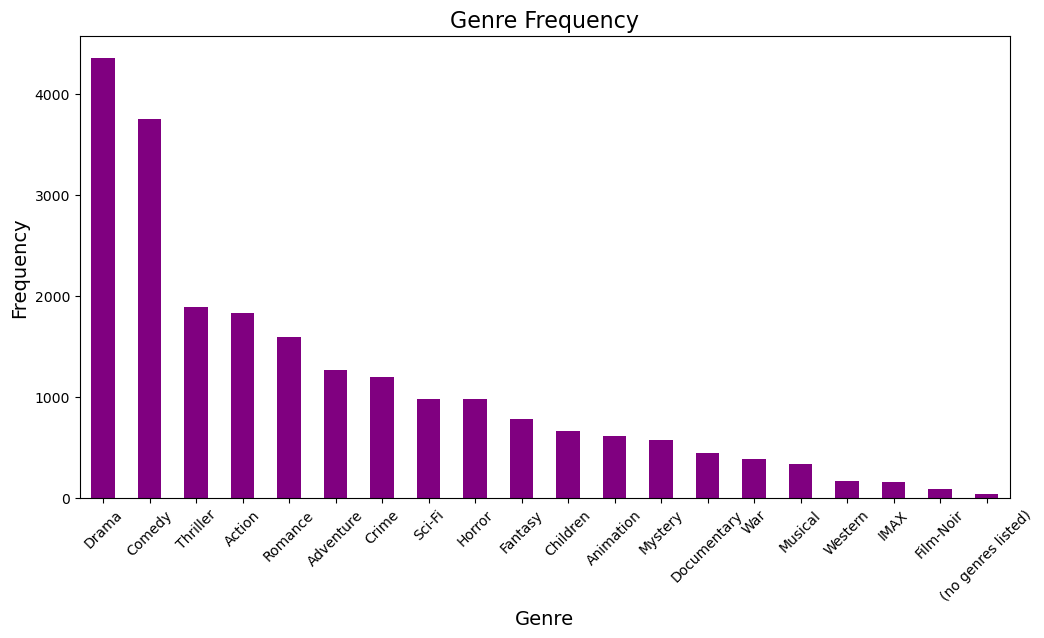

In [13]:
# Visualize the genre frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
genre_count.plot(kind='bar', color='purple')
plt.title('Genre Frequency', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [14]:
# Feature Engineering

# 1. Create average rating for each movie
movie_avg_ratings = merged_data.groupby('movieId')['rating'].mean().reset_index()
movie_avg_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)
print("\nAverage Ratings for Movies:")
print(movie_avg_ratings.head())



Average Ratings for Movies:
   movieId  average_rating
0        1        3.920930
1        2        3.431818
2        3        3.259615
3        4        2.357143
4        5        3.071429


In [15]:
# 2. Calculate the number of ratings for each movie
movie_rating_count = merged_data.groupby('movieId')['rating'].count().reset_index()
movie_rating_count.rename(columns={'rating': 'rating_count'}, inplace=True)
print("\nNumber of Ratings for Movies:")
print(movie_rating_count.head())


Number of Ratings for Movies:
   movieId  rating_count
0        1           215
1        2           110
2        3            52
3        4             7
4        5            49


In [16]:
# Merge these features with the movies dataset
movies_features = pd.merge(movie_avg_ratings, movie_rating_count, on='movieId', how='inner')
movies_features = pd.merge(movies_features, movies[['movieId', 'title', 'genres']], on='movieId', how='inner')
print("\nMovies Dataset with Features:")
print(movies_features.head())



Movies Dataset with Features:
   movieId  average_rating  rating_count                               title  \
0        1        3.920930           215                    Toy Story (1995)   
1        2        3.431818           110                      Jumanji (1995)   
2        3        3.259615            52             Grumpier Old Men (1995)   
3        4        2.357143             7            Waiting to Exhale (1995)   
4        5        3.071429            49  Father of the Bride Part II (1995)   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


In [17]:
# 3. Normalize the average rating and rating count
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
movies_features[['average_rating_normalized', 'rating_count_normalized']] = scaler.fit_transform(
    movies_features[['average_rating', 'rating_count']]
)
print("\nNormalized Features:")
print(movies_features[['average_rating_normalized', 'rating_count_normalized']].head())



Normalized Features:
   average_rating_normalized  rating_count_normalized
0                   0.760207                 0.652439
1                   0.651515                 0.332317
2                   0.613248                 0.155488
3                   0.412698                 0.018293
4                   0.571429                 0.146341


In [18]:
# 4. User-level statistics
user_avg_ratings = merged_data.groupby('userId')['rating'].mean().reset_index()
user_avg_ratings.rename(columns={'rating': 'user_average_rating'}, inplace=True)

user_rating_count = merged_data.groupby('userId')['rating'].count().reset_index()
user_rating_count.rename(columns={'rating': 'user_rating_count'}, inplace=True)

user_features = pd.merge(user_avg_ratings, user_rating_count, on='userId', how='inner')
print("\nUser Features:")
print(user_features.head())



User Features:
   userId  user_average_rating  user_rating_count
0       1             4.366379                232
1       2             3.948276                 29
2       3             2.435897                 39
3       4             3.555556                216
4       5             3.636364                 44


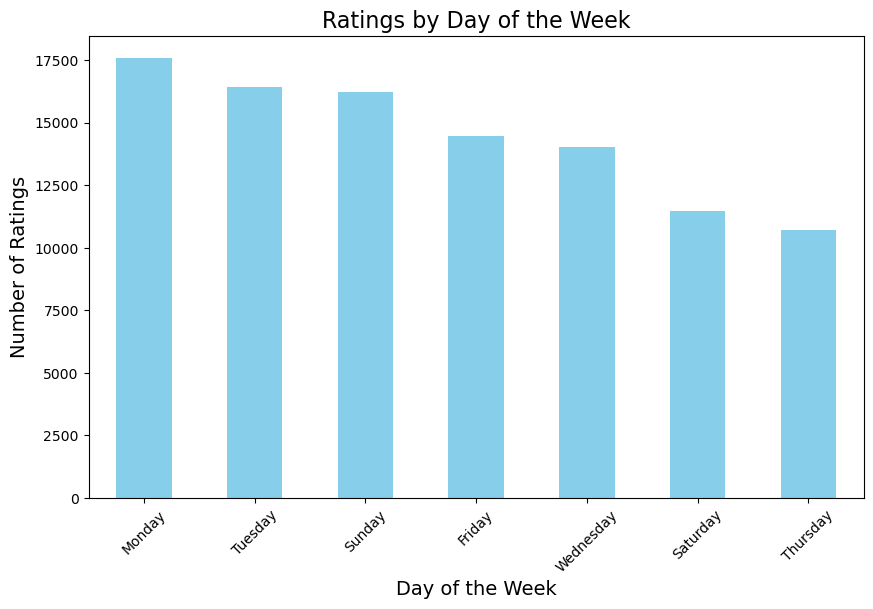

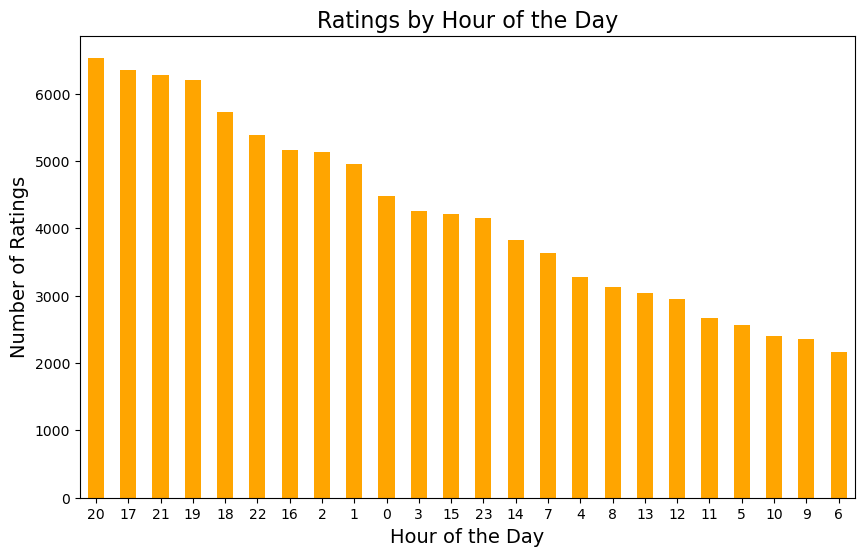

In [19]:
# 5. Temporal features
# Extract day of the week and hour of the day when ratings were made
merged_data['day_of_week'] = merged_data['timestamp'].dt.day_name()
merged_data['hour_of_day'] = merged_data['timestamp'].dt.hour

# Analyze temporal trends
day_of_week_counts = merged_data['day_of_week'].value_counts()
hour_of_day_counts = merged_data['hour_of_day'].value_counts()

plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Ratings by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
hour_of_day_counts.plot(kind='bar', color='orange')
plt.title('Ratings by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=0)
plt.show()


In [20]:
# 6. Genre-based features
# Count the number of movies for each genre
genre_count = pd.Series(np.concatenate(movies['genres'])).value_counts()
movies_features['num_genres'] = movies_features['genres'].apply(lambda x: len(x))
print("\nMovies with Number of Genres:")
print(movies_features[['title', 'genres', 'num_genres']].head())



Movies with Number of Genres:
                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                              genres  num_genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]           5  
1                     [Adventure, Children, Fantasy]           3  
2                                  [Comedy, Romance]           2  
3                           [Comedy, Drama, Romance]           3  
4                                           [Comedy]           1  


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Prepare the user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_sparse_matrix = csr_matrix(user_item_matrix)

# User-Based Collaborative Filtering
user_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
user_knn.fit(user_sparse_matrix)

# Item-Based Collaborative Filtering
item_item_matrix = ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)
item_sparse_matrix = csr_matrix(item_item_matrix)
item_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
item_knn.fit(item_sparse_matrix)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [22]:
!pip install scikit-surprise



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# Load data into Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
svd_model = SVD()
svd_model.fit(trainset)

# Evaluate
predictions = svd_model.test(testset)
print("SVD RMSE:", accuracy.rmse(predictions))


RMSE: 0.8795
SVD RMSE: 0.87950906931686


In [24]:
from sklearn.metrics.pairwise import linear_kernel

# Prepare the genre feature matrix
movies['genre_str'] = movies['genres'].apply(lambda x: ' '.join(x))
genre_matrix = movies['genre_str'].str.get_dummies(sep=' ')

# Compute cosine similarity
cosine_sim = linear_kernel(genre_matrix, genre_matrix)

# Function to get recommendations based on content similarity
def get_content_recommendations(movie_title, top_n=10):
    movie_index = movies[movies['title'].str.contains(movie_title, case=False)].index[0]
    similarity_scores = list(enumerate(cosine_sim[movie_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_movies = [movies.iloc[i[0]].title for i in similarity_scores[1:top_n + 1]]
    return similar_movies

# Example
print(get_content_recommendations("Toy Story"))


['Space Jam (1996)', 'Antz (1998)', 'Who Framed Roger Rabbit? (1988)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Shrek (2001)', 'Monsters, Inc. (2001)', "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)", 'Robots (2005)']


In [25]:
def hybrid_recommendations(user_id, movie_title, top_n=10):
    # Collaborative part (SVD)
    user_ratings = trainset.ur[trainset.to_inner_uid(user_id)]
    user_rated_movies = [trainset.to_raw_iid(movie[0]) for movie in user_ratings]
    
    # Content-Based part
    similar_movies = get_content_recommendations(movie_title, top_n=top_n)
    
    # Combine both (filter out already rated movies)
    hybrid_results = [movie for movie in similar_movies if movie not in user_rated_movies]
    return hybrid_results[:top_n]

# Example
print(hybrid_recommendations(user_id=1, movie_title="Toy Story", top_n=10))


['Space Jam (1996)', 'Antz (1998)', 'Who Framed Roger Rabbit? (1988)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)', "Emperor's New Groove, The (2000)", 'Shrek (2001)', 'Monsters, Inc. (2001)', "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)", 'Robots (2005)']


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_predictions(true_ratings, predicted_ratings):
    rmse = mean_squared_error(true_ratings, predicted_ratings, squared=False)
    mae = mean_absolute_error(true_ratings, predicted_ratings)
    return rmse, mae

# Example for evaluation
true_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [pred.est for pred in predictions]
rmse, mae = evaluate_predictions(true_ratings, predicted_ratings)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


RMSE: 0.8795
MAE: 0.6751


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


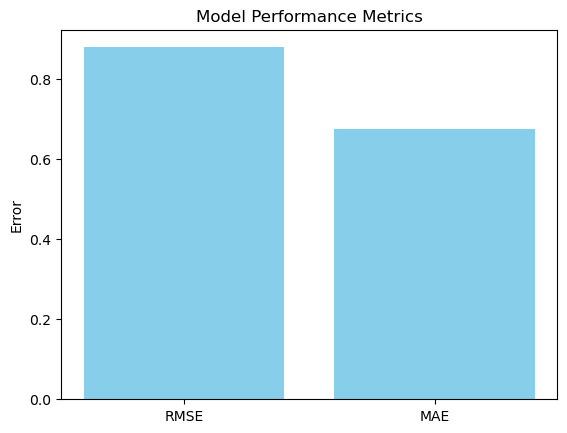

In [27]:
import matplotlib.pyplot as plt

metrics = {'RMSE': rmse, 'MAE': mae}
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.title("Model Performance Metrics")
plt.ylabel("Error")
plt.show()


In [ ]:
from surprise.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_factors': [50, 100, 150],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

# Perform grid search
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Best parameters
print("Best RMSE:", grid_search.best_score['rmse'])
print("Best Parameters:", grid_search.best_params['rmse'])

# Train final model
best_svd = grid_search.best_estimator['rmse']
best_svd.fit(trainset)
